In [9]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 487.6 kB/s eta 0:01:20
   ---------------------------------------- 0.3/38.6 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.0/38.6 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/38.6 MB 12.2 MB/s eta 0:00:03
   ---- ----------------------------------- 4.3/38.6 MB 16.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.6 MB 20.0 MB/s eta 0:00:02
   -------- ------------------------------- 8.3/38.6 MB 24.0 MB/s eta 0:00:02
   ---------- ----------------------------- 10.0/38.6 MB 25.6 MB/s eta 0:00:02
   ------------

In [10]:
import cv2

In [4]:
import tifffile
from skimage import io
from PIL import Image
# import cv2
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn
import torch.nn.functional as F

from glob import glob
import os.path as osp
import numpy as np
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [5]:
BASE_PATH='archive/'
IMAGES_PATH = osp.join(BASE_PATH, 'Images')
LABELS_PATH = osp.join(BASE_PATH, 'Masks')

In [6]:
imgs_paths = glob(osp.join(IMAGES_PATH,"*.tif"))

In [7]:
masks_paths = [osp.join(LABELS_PATH, i.rsplit("/",1)[-1].split("_ccd")[0]+".TIF") for i in imgs_paths]

In [68]:
img_mask_tuples = list(zip(imgs_paths, masks_paths))

In [51]:
def get_tiff_image(path, normalized=True,resize=(512, 512)):
    image = io.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512, 512))
    if normalized:
        return image/255
    return image

In [77]:
class BCDataset(torch.utils.data.Dataset):
    
    def __init__(self, img_mask_tuples):
        self.img_mask_tuples = img_mask_tuples
        
    def __len__(self,):
        return len(self.img_mask_tuples)
    
    def __getitem__(self, idx):
        
        img_path, mask_path = self.img_mask_tuples[idx]
        
        image = get_tiff_image(img_path)
        mask = get_tiff_image(mask_path)
        
        return image, mask

In [78]:
train_dataset = BCDataset(img_mask_tuples)

In [70]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

(512, 512, 3)


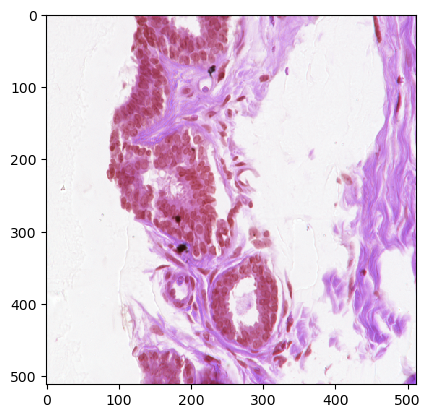

In [84]:
fotka = train_dataset.__getitem__(2)
print(fotka[0].shape)
plt.imshow(fotka[0], interpolation='nearest')
plt.show()

(512, 512, 3)


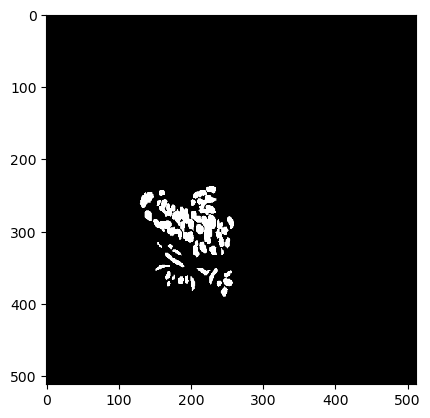

In [85]:
fotka = train_dataset.__getitem__(2)
print(fotka[0].shape)
plt.imshow(fotka[1], interpolation='nearest')
plt.show()

(512, 512, 3)


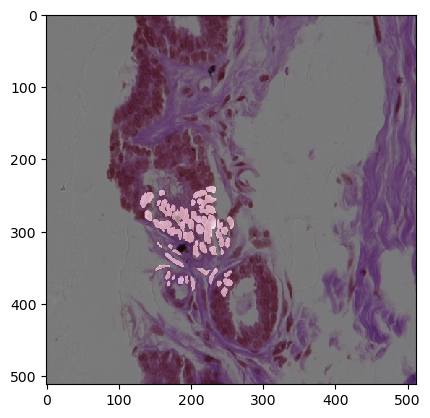

In [90]:
krotka = train_dataset.__getitem__(2)
fotka = krotka[0]
maska = krotka[1]
print(fotka.shape)
fotka = fotka / 2
fotka = fotka + maska / 2
plt.imshow(fotka, interpolation='nearest')
plt.show()